In [1]:
import matplotlib.pylab as pylab
import matplotlib.pyplot as plt
import numpy as np
import cv2
import time

imgL = cv2.imread('./src/view0.png', 0)
imgR = cv2.imread('./src/view1.png', 0)

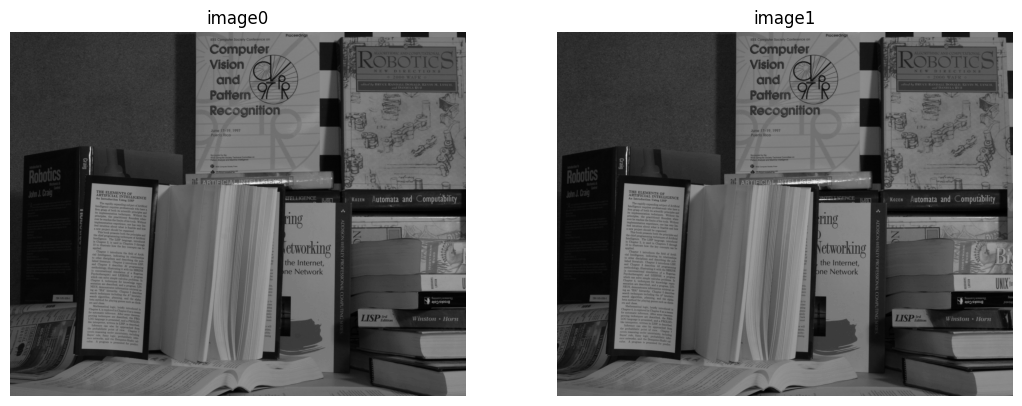

In [2]:
pylab.figure(figsize=(20, 10)),pylab.gray()

pylab.subplot (2, 3, 1), pylab.imshow(imgL)
pylab.title('image0'), pylab.axis('off')
pylab.subplot (2, 3, 2), pylab.imshow(imgR)
pylab.title('image1'), pylab.axis('off')
pylab.subplots_adjust (wspace=0.2, hspace=0)
pylab.show()

time : 0.035423994064331055


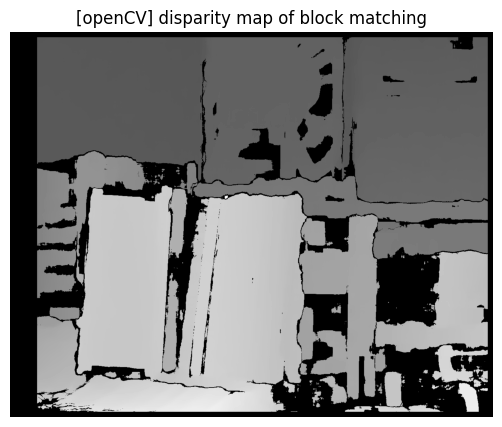

In [3]:
start = time.time()  # 시작 시간 저장
pylab.figure(figsize=(10, 5))

stereo = cv2.StereoBM_create(numDisparities=64, blockSize=31)
disparity = stereo.compute(imgL,imgR)

print("time :", time.time() - start)
pylab.imshow(disparity,'gray'), pylab.axis('off'), pylab.title('[openCV] disparity map of block matching')
pylab.show()

time : 0.1958169937133789


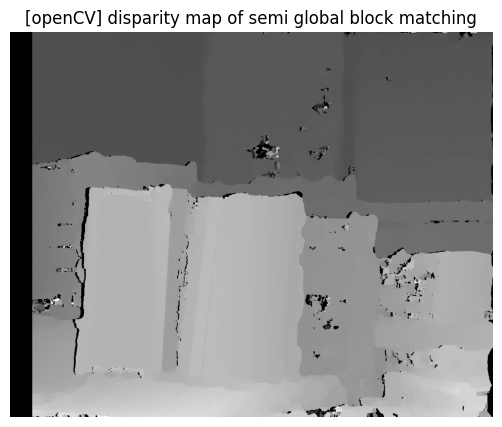

In [4]:
start = time.time()  # 시작 시간 저장

stereo = cv2.StereoSGBM_create(numDisparities=64, blockSize=31)
disparity = stereo.compute(imgL,imgR)

print("time :", time.time() - start)
pylab.figure(figsize=(10, 5))
pylab.imshow(disparity,'gray'), pylab.axis('off'), pylab.title('[openCV] disparity map of semi global block matching')
pylab.show()

In [5]:
def depth_map(imgL, imgR):
    """ Depth map calculation. Works with SGBM and WLS. Need rectified images, returns depth map ( left to right disparity ) """
    # SGBM Parameters -----------------
    window_size = 3  # wsize default 3; 5; 7 for SGBM reduced size image; 15 for SGBM full size image (1300px and above); 5 Works nicely

    left_matcher = cv2.StereoSGBM_create(
        minDisparity=-1,
        numDisparities=5*16,  # max_disp has to be dividable by 16 f. E. HH 192, 256
        blockSize=window_size,
        P1=8 * 3 * window_size,
        # wsize default 3; 5; 7 for SGBM reduced size image; 15 for SGBM full size image (1300px and above); 5 Works nicely
        P2=32 * 3 * window_size,
        disp12MaxDiff=12,
        uniquenessRatio=10,
        speckleWindowSize=50,
        speckleRange=32,
        preFilterCap=63,
        mode=cv2.STEREO_SGBM_MODE_SGBM_3WAY
    )
    right_matcher = cv2.ximgproc.createRightMatcher(left_matcher)
    # FILTER Parameters
    lmbda = 80000
    sigma = 1.3
    visual_multiplier = 6

    wls_filter = cv2.ximgproc.createDisparityWLSFilter(matcher_left=left_matcher)
    wls_filter.setLambda(lmbda)

    wls_filter.setSigmaColor(sigma)
    displ = left_matcher.compute(imgL, imgR)  # .astype(np.float32)/16
    dispr = right_matcher.compute(imgR, imgL)  # .astype(np.float32)/16
    displ = np.int16(displ)
    dispr = np.int16(dispr)
    filteredImg = wls_filter.filter(displ, imgL, None, dispr)  # important to put "imgL" here!!!

    filteredImg = cv2.normalize(src=filteredImg, dst=filteredImg, beta=0, alpha=255, norm_type=cv2.NORM_MINMAX);
    filteredImg = np.uint8(filteredImg)

    return filteredImg

time : 1.8835067749023438e-05


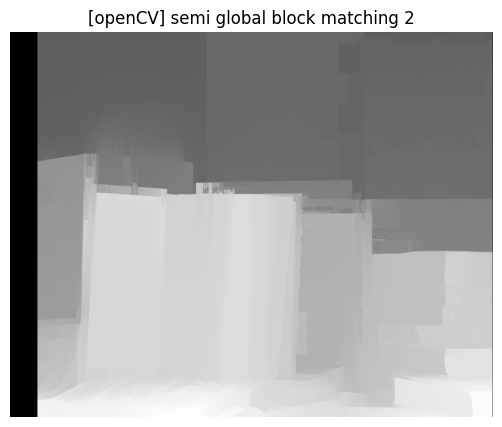

In [6]:
start = time.time()  # 시작 시간 저장
print("time :", time.time() - start)

sgbm2 = depth_map(imgL, imgR)
pylab.figure(figsize=(10, 5))
pylab.imshow(sgbm2,'gray'), pylab.axis('off'), pylab.title('[openCV] semi global block matching 2')
pylab.show()